In [2]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import numpy
from keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from matplotlib.mlab import PCA


# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
     
    print("Confusion Matrix:\n",
        confusion_matrix(y_test, y_pred))
     
    print ("Accuracy :\n",
    accuracy_score(y_test,y_pred)*100)
     
    print("Report :\n",
    classification_report(y_test, y_pred))
 
data = pd.read_csv('CNNIBN_Cleaned.csv')
print ("Dataset Length: ", len(data))
print ("Dataset Shape: ", data.shape)
X = data.values[:, 0:204]
y = data.values[:, 204]
 
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)

# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# Performing training
start = time.clock()
clf_gini.fit(X_train, y_train)
print("Time taken to train using gini:",time.clock()-start)    
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
# Performing training
start = time.clock()
clf_entropy.fit(X_train, y_train)
print("Time taken to train using entropy:",time.clock()-start)   
     
# Operational Phase

print("Results Using Gini Index:")     
# Prediction using gini
start = time.clock()
y_pred_gini = clf_gini.predict(X_test)
print("Time taken to test using gini:",time.clock()-start)    
cal_accuracy(y_test, y_pred_gini)
     
print("Results Using Entropy:")
# Prediction using entropy
start = time.clock()
y_pred_entropy = clf_entropy.predict(X_test)
print("Time taken to test using entropy:",time.clock()-start)    
cal_accuracy(y_test, y_pred_entropy)

/Users/Ayush/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Dataset Length:  33117
Dataset Shape:  (33117, 205)
(23181, 204)
(23181,)
Time taken to train using gini: 1.246314
Time taken to train using entropy: 1.6735539999999993
Results Using Gini Index:
Time taken to test using gini: 0.01654100000000014
Confusion Matrix:
 [[2528  969]
 [ 390 6049]]
Accuracy :
 86.32246376811594
Report :
              precision    recall  f1-score   support

       -1.0       0.87      0.72      0.79      3497
        1.0       0.86      0.94      0.90      6439

avg / total       0.86      0.86      0.86      9936

Results Using Entropy:
Time taken to test using entropy: 0.006837999999998345
Confusion Matrix:
 [[2251 1246]
 [ 327 6112]]
Accuracy :
 84.16867954911433
Report :
              precision    recall  f1-score   support

       -1.0       0.87      0.64      0.74      3497
        1.0       0.83      0.95      0.89      6439

avg / total       0.85      0.84      0.83      9936



In [3]:
#SVM Algorithm
svm_model_linear = SVC(kernel = 'linear', C = 1)
print(X_train.shape)
print(y_train.shape)
start = time.clock()
svm_model_linear.fit(X_train, y_train)
print("Time taken to train using svm:",time.clock()-start)    
start = time.clock()
svm_predictions = svm_model_linear.predict(X_test)
print("Time taken to test using svm:",time.clock()-start)    
cal_accuracy(y_test, svm_predictions)

(23181, 204)
(23181,)
Time taken to train using svm: 671.679845
Time taken to test using svm: 15.529901999999993
Confusion Matrix:
 [[2567  930]
 [ 456 5983]]
Accuracy :
 86.05072463768117
Report :
              precision    recall  f1-score   support

       -1.0       0.85      0.73      0.79      3497
        1.0       0.87      0.93      0.90      6439

avg / total       0.86      0.86      0.86      9936



In [3]:
# baseline model
#ANN
def create_baseline():
 # create model
    model = Sequential()
    model.add(Dense(2, input_dim=204, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# evaluate model with standardized dataset
# fix random seed for reproducibility


seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=500, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
start = time.clock()
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Time taken for cross validation:",time.clock()-start)    
print(X.shape)
print(y.shape)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
 - 0s - loss: 0.6735 - acc: 0.6558
Epoch 2/50
 - 0s - loss: 0.6515 - acc: 0.6550
Epoch 3/50
 - 0s - loss: 0.6457 - acc: 0.6550
Epoch 4/50
 - 0s - loss: 0.6438 - acc: 0.6550
Epoch 5/50
 - 0s - loss: 0.6427 - acc: 0.6550
Epoch 6/50
 - 0s - loss: 0.6410 - acc: 0.6550
Epoch 7/50
 - 0s - loss: 0.6372 - acc: 0.6550
Epoch 8/50
 - 0s - loss: 0.6268 - acc: 0.6550
Epoch 9/50
 - 0s - loss: 0.5975 - acc: 0.6550
Epoch 10/50
 - 0s - loss: 0.5433 - acc: 0.6550
Epoch 11/50
 - 0s - loss: 0.4858 - acc: 0.6550
Epoch 12/50
 - 0s - loss: 0.4375 - acc: 0.6715
Epoch 13/50
 - 0s - loss: 0.3949 - acc: 0.8843
Epoch 14/50
 - 0s - loss: 0.3592 - acc: 0.8930
Epoch 15/50
 - 0s - loss: 0.3322 - acc: 0.8993
Epoch 16/50
 - 0s - loss: 0.3109 - acc: 0.9045
Epoch 17/50
 - 0s - loss: 0.2939 - acc: 0.9090
Epoch 18/50
 - 0s - loss: 0.2800 - acc: 0.9118
Epoch 19/50
 - 0s - loss: 0.2687 - acc: 0.9137
Epoch 20/50
 - 0s - loss: 0.2593 - acc: 0.9149
Epoch 21/50
 - 0s - loss: 0.2512 - acc: 0.9171
Epoch 22/50
 - 0s - lo

 - 0s - loss: 0.2434 - acc: 0.9169
Epoch 27/50
 - 0s - loss: 0.2374 - acc: 0.9184
Epoch 28/50
 - 0s - loss: 0.2327 - acc: 0.9188
Epoch 29/50
 - 0s - loss: 0.2286 - acc: 0.9195
Epoch 30/50
 - 0s - loss: 0.2252 - acc: 0.9162
Epoch 31/50
 - 0s - loss: 0.2222 - acc: 0.9171
Epoch 32/50
 - 0s - loss: 0.2195 - acc: 0.9183
Epoch 33/50
 - 0s - loss: 0.2175 - acc: 0.9176
Epoch 34/50
 - 0s - loss: 0.2152 - acc: 0.9185
Epoch 35/50
 - 0s - loss: 0.2135 - acc: 0.9190
Epoch 36/50
 - 0s - loss: 0.2119 - acc: 0.9193
Epoch 37/50
 - 0s - loss: 0.2104 - acc: 0.9197
Epoch 38/50
 - 0s - loss: 0.2088 - acc: 0.9197
Epoch 39/50
 - 0s - loss: 0.2077 - acc: 0.9201
Epoch 40/50
 - 0s - loss: 0.2064 - acc: 0.9209
Epoch 41/50
 - 0s - loss: 0.2056 - acc: 0.9222
Epoch 42/50
 - 0s - loss: 0.2046 - acc: 0.9252
Epoch 43/50
 - 0s - loss: 0.2035 - acc: 0.9255
Epoch 44/50
 - 0s - loss: 0.2024 - acc: 0.9262
Epoch 45/50
 - 0s - loss: 0.2016 - acc: 0.9259
Epoch 46/50
 - 0s - loss: 0.2008 - acc: 0.9265
Epoch 47/50
 - 0s - loss:

In [4]:
print(type(data))
(n,p)=(data[data['Label']==-1],data[data['Label']==1]) # dividing df into two new dfs
print(n.shape)
print(p.shape)
#21693 +ve labels, 11424 -ve labels
p = p.iloc[:11424] # slicing
data = pd.concat([n,p]) # merging them again, now we have same number of +ve and -ve reviews
data=data.sample(frac=1) # shuffling the rows
data=data.reset_index(drop=True) # reset index
print(data.shape)
data.describe()

<class 'pandas.core.frame.DataFrame'>
(11424, 205)
(21693, 205)
(22848, 205)


,1,2,3,4,5,6,7,8,9,10,...,924,959,1002,1016,1028,1048,1112,4124,4125,Label
count,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,...,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000,22848.000000
mean,98.116246,2.910306,1.749344,13.559205,8.865996,0.015107,0.010420,0.106737,0.059480,3596.644097,...,0.019100,0.023290,0.019954,0.019382,0.000080,0.018220,0.000574,0.500227,0.499437,0.000000
std,239.742374,2.190076,1.324933,9.061300,6.786087,0.004366,0.002886,0.030565,0.019152,230.354699,...,0.043841,0.043708,0.040220,0.044261,0.000935,0.034942,0.003405,0.289458,0.288786,1.000022
min,25.000000,0.028928,0.007988,0.451168,0.182447,0.000035,0.000016,0.011621,0.005959,1092.421021,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000067,0.000027,-1.000000
25%,30.000000,1.226711,0.839096,6.727920,3.805882,0.012609,0.008563,0.087490,0.047077,3411.841247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246764,0.249865,-1.000000
50%,50.000000,2.326412,1.512451,11.388556,7.049645,0.015369,0.010618,0.104871,0.056257,3627.747070,...,0.000000,0.005449,0.000000,0.000000,0.000000,0.000000,0.000000,0.502497,0.499007,0.000000
75%,98.000000,4.103518,2.292123,18.697786,12.250341,0.017900,0.012488,0.124118,0.067812,3782.408631,...,0.020000,0.027480,0.021536,0.013158,0.000000,0.023039,0.000000,0.751876,0.748735,1.000000
max,16201.000000,14.958882,37.363274,64.107498,45.679489,0.032740,0.020036,0.386957,0.205533,3985.526123,...,0.762500,0.812500,0.577586,0.621622,0.037500,0.530303,0.148148,0.999948,0.999997,1.000000


In [5]:
X = data.values[:, 0:204]
y = data.values[:, 204]
 
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# Performing training
start = time.clock()
clf_gini.fit(X_train, y_train)
print("Time taken to train using gini:",time.clock()-start)    

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
# Performing training
start = time.clock()
clf_entropy.fit(X_train, y_train)
print("Time taken to train using entropy:",time.clock()-start)    

print(X_train.shape)
print(y_train.shape)

# Operational Phase

print("Results Using Gini Index:")     
# Prediction using gini
start = time.clock()
y_pred_gini = clf_gini.predict(X_test)
print("Time taken to test using gini:",time.clock()-start)    
cal_accuracy(y_test, y_pred_gini)
     
print("Results Using Entropy:")
# Prediction using entropy
start = time.clock()
y_pred_entropy = clf_entropy.predict(X_test)
print("Time taken to test using entropy:",time.clock()-start)    
cal_accuracy(y_test, y_pred_entropy)

Time taken to train using gini: 1.0106718416031981
Time taken to train using gini: 1.4498327244741915
(15993, 204)
(15993,)
Results Using Gini Index:
Time taken to test using gini: 0.006311592967932711
Confusion Matrix:
 [[2831  591]
 [ 438 2995]]
Accuracy :
 84.989059081
Report :
              precision    recall  f1-score   support

       -1.0       0.87      0.83      0.85      3422
        1.0       0.84      0.87      0.85      3433

avg / total       0.85      0.85      0.85      6855

Results Using Entropy:
Time taken to test using entropy: 0.006546965332375976
Confusion Matrix:
 [[3250  172]
 [ 965 2468]]
Accuracy :
 83.4135667396
Report :
              precision    recall  f1-score   support

       -1.0       0.77      0.95      0.85      3422
        1.0       0.93      0.72      0.81      3433

avg / total       0.85      0.83      0.83      6855



In [6]:
print(X_train.shape)
print(y_train.shape)
start = time.clock()
svm_model_linear.fit(X_train, y_train)
print("Time taken to train using svm:",time.clock()-start)    
start = time.clock()
svm_predictions = svm_model_linear.predict(X_test)
print("Time taken to test using svm:",time.clock()-start)    
cal_accuracy(y_test, svm_predictions)

(15993, 204)
(15993,)
Time taken to train using svm: 532.5811343678323
Time taken to test using svm: 10.336436472168657
Confusion Matrix:
 [[2850  572]
 [ 442 2991]]
Accuracy :
 85.2078774617
Report :
              precision    recall  f1-score   support

       -1.0       0.87      0.83      0.85      3422
        1.0       0.84      0.87      0.86      3433

avg / total       0.85      0.85      0.85      6855



In [8]:
seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=500, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
start = time.clock()
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Time taken for cross validation:",time.clock()-start)    
print(X.shape)
print(y.shape)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
 - 1s - loss: 0.6930 - acc: 0.5014
Epoch 2/50
 - 0s - loss: 0.6930 - acc: 0.5307
Epoch 3/50
 - 0s - loss: 0.6930 - acc: 0.5818
Epoch 4/50
 - 0s - loss: 0.6929 - acc: 0.5057
Epoch 5/50
 - 0s - loss: 0.6928 - acc: 0.5553
Epoch 6/50
 - 0s - loss: 0.6926 - acc: 0.6314
Epoch 7/50
 - 0s - loss: 0.6924 - acc: 0.6401
Epoch 8/50
 - 0s - loss: 0.6921 - acc: 0.6068
Epoch 9/50
 - 0s - loss: 0.6916 - acc: 0.6565
Epoch 10/50
 - 0s - loss: 0.6906 - acc: 0.6670
Epoch 11/50
 - 0s - loss: 0.6888 - acc: 0.6804
Epoch 12/50
 - 0s - loss: 0.6849 - acc: 0.6930
Epoch 13/50
 - 0s - loss: 0.6758 - acc: 0.7097
Epoch 14/50
 - 0s - loss: 0.6528 - acc: 0.7305
Epoch 15/50
 - 0s - loss: 0.6035 - acc: 0.7630
Epoch 16/50
 - 0s - loss: 0.5351 - acc: 0.8193
Epoch 17/50
 - 0s - loss: 0.4701 - acc: 0.8605
Epoch 18/50
 - 0s - loss: 0.4206 - acc: 0.8808
Epoch 19/50
 - 0s - loss: 0.3845 - acc: 0.8880
Epoch 20/50
 - 0s - loss: 0.3566 - acc: 0.8936
Epoch 21/50
 - 0s - loss: 0.3327 - acc: 0.9000
Epoch 22/50
 - 0s - lo

 - 0s - loss: 0.6931 - acc: 0.5028
Epoch 27/50
 - 0s - loss: 0.6932 - acc: 0.5021
Epoch 28/50
 - 0s - loss: 0.6932 - acc: 0.4969
Epoch 29/50
 - 0s - loss: 0.6932 - acc: 0.5000
Epoch 30/50
 - 0s - loss: 0.6932 - acc: 0.4984
Epoch 31/50
 - 0s - loss: 0.6932 - acc: 0.5026
Epoch 32/50
 - 0s - loss: 0.6932 - acc: 0.4943
Epoch 33/50
 - 0s - loss: 0.6932 - acc: 0.5005
Epoch 34/50
 - 0s - loss: 0.6931 - acc: 0.4961
Epoch 35/50
 - 0s - loss: 0.6932 - acc: 0.4966
Epoch 36/50
 - 0s - loss: 0.6932 - acc: 0.4963
Epoch 37/50
 - 0s - loss: 0.6932 - acc: 0.4946
Epoch 38/50
 - 0s - loss: 0.6931 - acc: 0.4986
Epoch 39/50
 - 0s - loss: 0.6932 - acc: 0.4987
Epoch 40/50
 - 0s - loss: 0.6931 - acc: 0.5032
Epoch 41/50
 - 0s - loss: 0.6931 - acc: 0.5075
Epoch 42/50
 - 0s - loss: 0.6932 - acc: 0.4956
Epoch 43/50
 - 0s - loss: 0.6931 - acc: 0.4979
Epoch 44/50
 - 0s - loss: 0.6932 - acc: 0.4995
Epoch 45/50
 - 0s - loss: 0.6932 - acc: 0.5007
Epoch 46/50
 - 0s - loss: 0.6931 - acc: 0.5040
Epoch 47/50
 - 0s - loss:

In [9]:
#construct your numpy array of data
myData = np.array(data) 
results = PCA(myData) 

#this will return an array of variance percentages for each component
print(results.fracs)

[  1.73456659e-01   5.55101056e-02   4.84715062e-02   4.19888867e-02
   3.78874266e-02   2.82280892e-02   2.09551744e-02   1.96005725e-02
   1.76322375e-02   1.71421847e-02   1.52703071e-02   1.42663146e-02
   1.36382321e-02   1.32999108e-02   1.20342950e-02   1.18615563e-02
   1.07143064e-02   1.01395230e-02   9.95617230e-03   9.71632972e-03
   9.10387854e-03   8.80377792e-03   8.31736640e-03   8.04807303e-03
   7.89157503e-03   7.73593288e-03   7.61668543e-03   7.22969670e-03
   6.72694539e-03   6.55597772e-03   6.44946626e-03   6.30787934e-03
   6.03830460e-03   5.90291388e-03   5.79797205e-03   5.77290698e-03
   5.62266612e-03   5.45719509e-03   5.40582922e-03   5.24872596e-03
   5.11608632e-03   5.10551916e-03   5.03413438e-03   4.93265198e-03
   4.90187087e-03   4.87319594e-03   4.85034801e-03   4.75156768e-03
   4.69141216e-03   4.63162002e-03   4.57724491e-03   4.48097997e-03
   4.43529094e-03   4.37326709e-03   4.33776161e-03   4.28330573e-03
   4.19963671e-03   4.12850088e-03

In [10]:
temp=0
for i in range(205):
    temp=temp+results.fracs[i]
    print(i,temp)

0 0.173456659364
1 0.228966764987
2 0.277438271175
3 0.319427157847
4 0.357314584461
5 0.385542673669
6 0.406497848083
7 0.426098420606
8 0.443730658071
9 0.46087284274
10 0.476143149806
11 0.490409464367
12 0.504047696459
13 0.517347607271
14 0.529381902222
15 0.541243458485
16 0.551957764913
17 0.562097287946
18 0.572053460247
19 0.581769789972
20 0.590873668517
21 0.59967744644
22 0.607994812837
23 0.616042885867
24 0.623934460897
25 0.631670393781
26 0.639287079213
27 0.646516775914
28 0.653243721304
29 0.659799699021
30 0.666249165281
31 0.672557044618
32 0.678595349217
33 0.684498263097
34 0.690296235147
35 0.696069142128
36 0.701691808252
37 0.707149003346
38 0.712554832569
39 0.717803558525
40 0.722919644843
41 0.728025163998
42 0.733059298376
43 0.737991950353
44 0.742893821224
45 0.747767017169
46 0.752617365177
47 0.757368932853
48 0.762060345013
49 0.766691965032
50 0.771269209941
51 0.775750189911
52 0.780185480852
53 0.78455874794
54 0.78889650955
55 0.793179815275
56 0.7

[  17.4256869    22.87648244   27.74722925   31.93755196   35.74216105
   38.51447212   40.60327686   42.57018116   44.34038487   46.06255739
   47.5903869    49.0240104    50.38927689   51.72523633   52.92346646
   54.10405245   55.1798051    56.19611237   57.1944691    58.17077628
   59.08326767   59.96791836   60.80192471   61.61036072   62.40338476
   63.18046684   63.94575254   64.67224115   65.34634095   65.99693619
   66.64461476   67.27849066   67.88491127   68.47741713   69.05826756
   69.63351135   70.19816945   70.74508204   71.28798549   71.81379346
   72.32773039   72.8407574    73.34657507   73.84196624   74.33433454
   74.82403876   75.31133367   75.78859566   76.25966499   76.7249157
   77.18380038   77.63405984   78.07974973   78.51917416   78.95472378
   79.38497369   79.80585414   80.22042305   80.62395107   81.02597962
   81.42080621   81.80938775   82.19272479   82.57039413   82.93992872
   83.30689931   83.67341553   84.0313946    84.38276865   84.72789642
   85.0

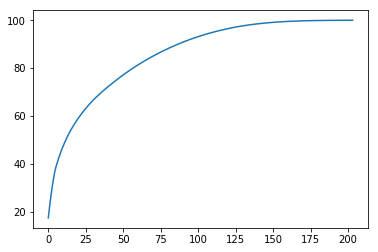

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components=204)
X=scale(X)
reduced_X = pca.fit_transform(X)
var = pca.explained_variance_ratio_
var1 = np.cumsum(pca.explained_variance_ratio_*100)
print(var1)
plt.plot(var1)

In [12]:
pca = PCA(n_components=72)
pca.fit(X)
X1=pca.fit_transform(X)
print(X1.shape)

(22848, 72)


In [13]:
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 100)

# Performing training
start = time.clock()
clf_gini.fit(X_train, y_train)
print("Time taken to train using gini:",time.clock()-start)    

# Performing training
start = time.clock()
clf_entropy.fit(X_train, y_train)
print("Time taken to train using entropy:",time.clock()-start)    

print(X_train.shape)
print(y_train.shape)    

# Operational Phase

print("Results Using Gini Index:")     
# Prediction using gini
start = time.clock()
y_pred_gini = clf_gini.predict(X_test)
print("Time taken to test using gini:",time.clock()-start)    
cal_accuracy(y_test, y_pred_gini)
     
print("Results Using Entropy:")
# Prediction using entropy
start = time.clock()
y_pred_entropy = clf_entropy.predict(X_test)
print("Time taken to test using entropy:",time.clock()-start)    
cal_accuracy(y_test, y_pred_entropy)

Time taken to train using gini: 0.597561600903191
Time taken to train using entropy: 0.9700022316426384
(15993, 72)
(15993,)
Results Using Gini Index:
Time taken to test using gini: 0.0026794360244366544
Confusion Matrix:
 [[2627  795]
 [ 711 2722]]
Accuracy :
 78.0306345733
Report :
              precision    recall  f1-score   support

       -1.0       0.79      0.77      0.78      3422
        1.0       0.77      0.79      0.78      3433

avg / total       0.78      0.78      0.78      6855

Results Using Entropy:
Time taken to test using entropy: 0.002551006705175496
Confusion Matrix:
 [[2440  982]
 [ 517 2916]]
Accuracy :
 78.1327498177
Report :
              precision    recall  f1-score   support

       -1.0       0.83      0.71      0.77      3422
        1.0       0.75      0.85      0.80      3433

avg / total       0.79      0.78      0.78      6855



In [14]:
print(X_train.shape)
print(y_train.shape)
start = time.clock()
svm_model_linear.fit(X_train, y_train)
print("Time taken to train using svm:",time.clock()-start)    
start = time.clock()
svm_predictions = svm_model_linear.predict(X_test)
print("Time taken to test using svm:",time.clock()-start)    
cal_accuracy(y_test, svm_predictions)

(15993, 72)
(15993,)
Time taken to train using svm: 73.33341569738343
Time taken to test using svm: 2.2820014854828514
Confusion Matrix:
 [[3059  363]
 [ 317 3116]]
Accuracy :
 90.0802334063
Report :
              precision    recall  f1-score   support

       -1.0       0.91      0.89      0.90      3422
        1.0       0.90      0.91      0.90      3433

avg / total       0.90      0.90      0.90      6855



In [25]:
def create_baseline():
 # create model
    model = Sequential()
    model.add(Dense(2, input_dim=72, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
seed = 7
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=500, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
start = time.clock()
results = cross_val_score(pipeline, X1, y, cv=kfold)
print("Time taken for cross validation:",time.clock()-start)    
print(X1.shape)
print(y.shape)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
 - 1s - loss: 0.6932 - acc: 0.4990
Epoch 2/50
 - 0s - loss: 0.6932 - acc: 0.4885
Epoch 3/50
 - 0s - loss: 0.6932 - acc: 0.4850
Epoch 4/50
 - 0s - loss: 0.6932 - acc: 0.5000
Epoch 5/50
 - 0s - loss: 0.6932 - acc: 0.4934
Epoch 6/50
 - 0s - loss: 0.6932 - acc: 0.4985
Epoch 7/50
 - 0s - loss: 0.6932 - acc: 0.4967
Epoch 8/50
 - 0s - loss: 0.6932 - acc: 0.4986
Epoch 9/50
 - 0s - loss: 0.6932 - acc: 0.4980
Epoch 10/50
 - 0s - loss: 0.6932 - acc: 0.4913
Epoch 11/50
 - 0s - loss: 0.6932 - acc: 0.4991
Epoch 12/50
 - 0s - loss: 0.6932 - acc: 0.4966
Epoch 13/50
 - 0s - loss: 0.6932 - acc: 0.4987
Epoch 14/50
 - 0s - loss: 0.6932 - acc: 0.4986
Epoch 15/50
 - 0s - loss: 0.6932 - acc: 0.5000
Epoch 16/50
 - 0s - loss: 0.6932 - acc: 0.4982
Epoch 17/50
 - 0s - loss: 0.6932 - acc: 0.4978
Epoch 18/50
 - 0s - loss: 0.6932 - acc: 0.4961
Epoch 19/50
 - 0s - loss: 0.6932 - acc: 0.5001
Epoch 20/50
 - 0s - loss: 0.6932 - acc: 0.4981
Epoch 21/50
 - 0s - loss: 0.6932 - acc: 0.4977
Epoch 22/50
 - 0s - lo

 - 0s - loss: 0.6931 - acc: 0.5096
Epoch 27/50
 - 0s - loss: 0.6931 - acc: 0.5057
Epoch 28/50
 - 0s - loss: 0.6931 - acc: 0.5010
Epoch 29/50
 - 0s - loss: 0.6931 - acc: 0.5000
Epoch 30/50
 - 0s - loss: 0.6931 - acc: 0.4974
Epoch 31/50
 - 0s - loss: 0.6931 - acc: 0.5092
Epoch 32/50
 - 0s - loss: 0.6931 - acc: 0.5061
Epoch 33/50
 - 0s - loss: 0.6931 - acc: 0.5103
Epoch 34/50
 - 0s - loss: 0.6931 - acc: 0.5079
Epoch 35/50
 - 0s - loss: 0.6931 - acc: 0.5016
Epoch 36/50
 - 0s - loss: 0.6931 - acc: 0.5044
Epoch 37/50
 - 0s - loss: 0.6931 - acc: 0.5219
Epoch 38/50
 - 0s - loss: 0.6931 - acc: 0.5079
Epoch 39/50
 - 0s - loss: 0.6931 - acc: 0.5076
Epoch 40/50
 - 0s - loss: 0.6931 - acc: 0.5384
Epoch 41/50
 - 0s - loss: 0.6931 - acc: 0.5408
Epoch 42/50
 - 0s - loss: 0.6931 - acc: 0.5190
Epoch 43/50
 - 0s - loss: 0.6931 - acc: 0.5381
Epoch 44/50
 - 0s - loss: 0.6931 - acc: 0.5097
Epoch 45/50
 - 0s - loss: 0.6931 - acc: 0.5063
Epoch 46/50
 - 0s - loss: 0.6931 - acc: 0.5521
Epoch 47/50
 - 0s - loss: